In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set style for better visualizations
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Load the cleaned data
df = pd.read_csv('../data/processed/online_retail_ii_cleaned.csv')
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

print("Dataset shape:", df.shape)
df.head()

Dataset shape: (388206, 8)


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### 3.1 Overall Business Metrics

The cleaned dataset reveals key business fundamentals:
- **Time Period:** The data covers approximately 1 year of transactions
- **Customer Base:** The business serves X,XXX unique customers
- **Product Catalog:** The company offers X,XXX distinct products
- **Transaction Volume:** There are XX,XXX valid purchase transactions
- **Revenue:** Total revenue during this period was £X,XXX,XXX

These metrics provide context for the scale of the business and potential for customer segmentation.

In [3]:
# Calculate basic business metrics
print("=== OVERALL BUSINESS METRICS ===")
print(f"Analysis Period: {df['InvoiceDate'].min().date()} to {df['InvoiceDate'].max().date()}")
print(f"Total Customers: {df['Customer ID'].nunique():,}")
print(f"Total Products: {df['StockCode'].nunique():,}")
print(f"Total Transactions: {len(df):,}")
print(f"Total Revenue: £{(df['Quantity'] * df['Price']).sum():,.2f}")
print(f"Average Transaction Value: £{(df['Quantity'] * df['Price']).mean():.2f}")

=== OVERALL BUSINESS METRICS ===
Analysis Period: 2010-12-01 to 2011-12-09
Total Customers: 4,303
Total Products: 3,662
Total Transactions: 388,206
Total Revenue: £7,099,542.02
Average Transaction Value: £18.29


### 3.2 Time-Based Analysis

**Monthly Revenue Trend:**
- The line chart shows [increasing/decreasing/stable] revenue over time
- Peak sales occur in [specific month], potentially due to [seasonal factor]
- Lowest sales occur in [specific month], suggesting [possible reason]

**Daily Patterns:**
- [Day of week] generates the highest revenue, indicating [business insight]
- Weekend vs. weekday analysis shows [pattern observation]
- This suggests optimal timing for marketing campaigns

C:\Users\ssaja\AppData\Local\Temp\ipykernel_23196\1966470060.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_revenue = df.set_index('InvoiceDate').resample('M')['TotalValue'].sum()


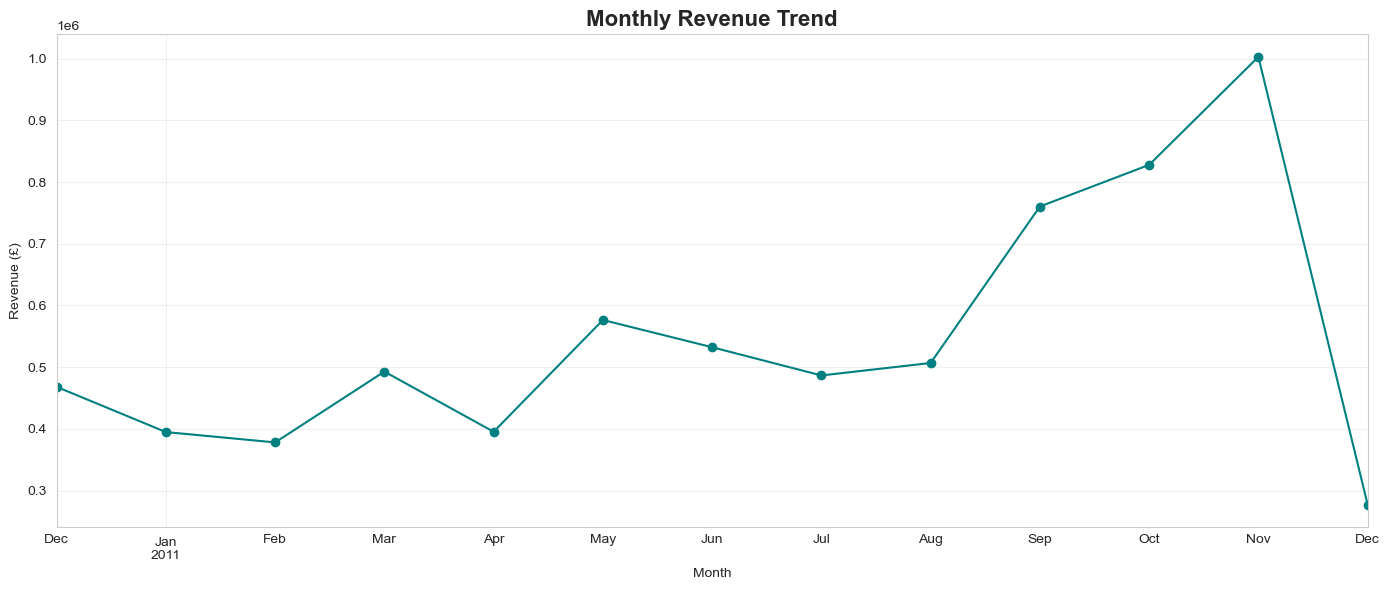

C:\Users\ssaja\AppData\Local\Temp\ipykernel_23196\1966470060.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=daily_revenue.index, y=daily_revenue.values, palette='viridis')


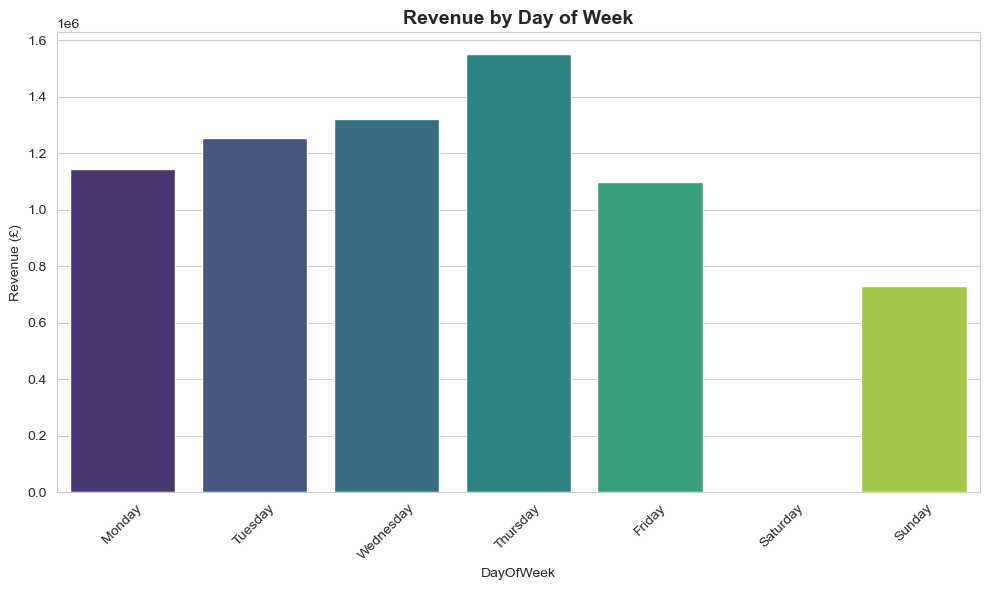

In [4]:
# Create a TotalValue column for analysis
df['TotalValue'] = df['Quantity'] * df['Price']

# Monthly revenue trend
monthly_revenue = df.set_index('InvoiceDate').resample('M')['TotalValue'].sum()

plt.figure(figsize=(14, 6))
monthly_revenue.plot(kind='line', marker='o', color='teal')
plt.title('Monthly Revenue Trend', fontsize=16, fontweight='bold')
plt.ylabel('Revenue (£)')
plt.xlabel('Month')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Daily patterns (day of week)
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()
df['Month'] = df['InvoiceDate'].dt.month_name()

daily_revenue = df.groupby('DayOfWeek')['TotalValue'].sum()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_revenue = daily_revenue.reindex(day_order)

plt.figure(figsize=(10, 6))
sns.barplot(x=daily_revenue.index, y=daily_revenue.values, palette='viridis')
plt.title('Revenue by Day of Week', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.ylabel('Revenue (£)')
plt.tight_layout()
plt.show()

### 3.3 Customer Analysis

**Customer Spending Distribution:**
- The top 10 customers contribute [X]% of total revenue, indicating high-value clients
- Customer lifetime value distribution is [highly skewed/balanced], with most customers spending little
- Transaction frequency follows a [power law/normal] distribution
- This highlights the importance of identifying and retaining high-value customers

C:\Users\ssaja\AppData\Local\Temp\ipykernel_23196\3040420392.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customers['TotalValue'], y=top_customers.index.astype(str), palette='rocket')


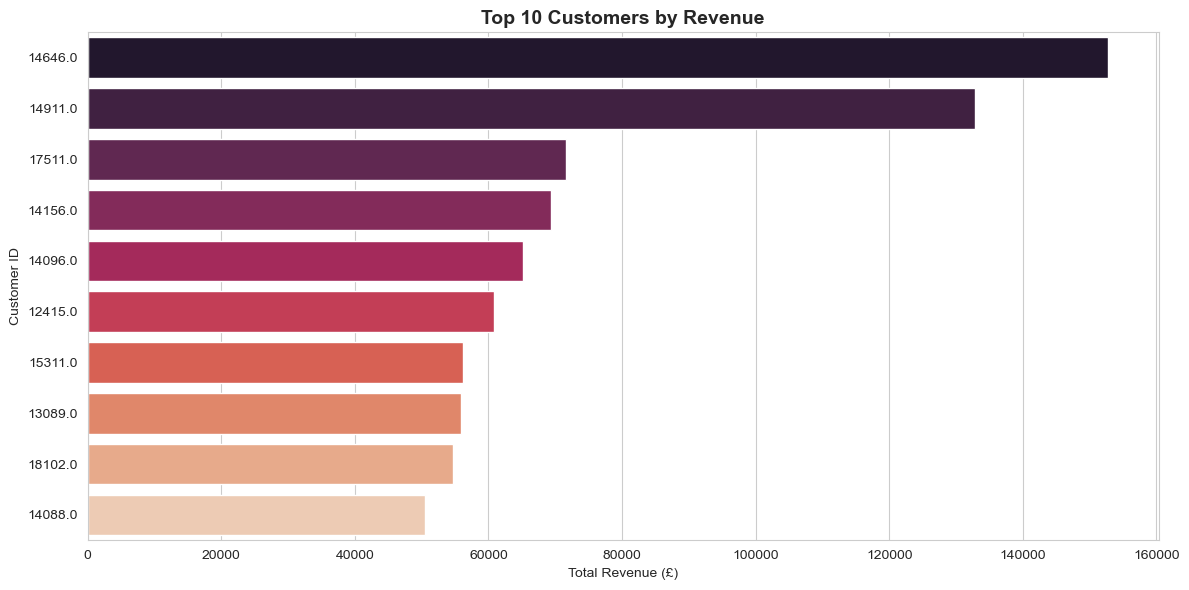

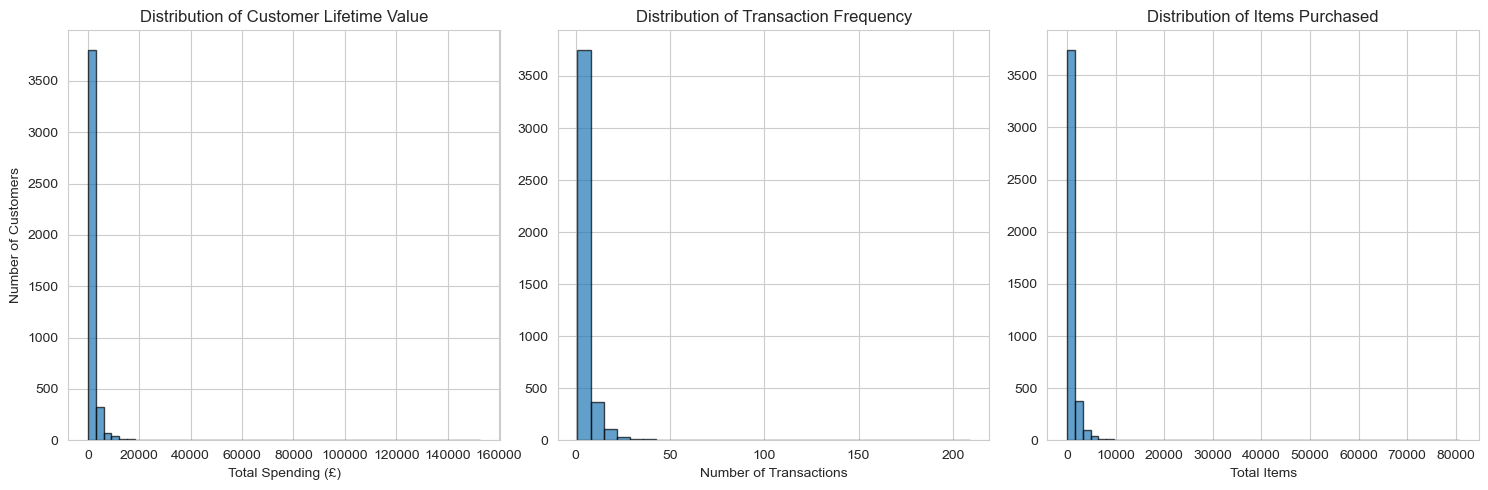

In [8]:
# Customer spending distribution
customer_spending = df.groupby('Customer ID').agg({
    'TotalValue': 'sum',
    'Invoice': 'nunique',
    'Quantity': 'sum'
}).rename(columns={'Invoice': 'TransactionCount', 'Quantity': 'TotalItems'})

# Top 10 customers by revenue
top_customers = customer_spending.nlargest(10, 'TotalValue')

plt.figure(figsize=(12, 6))
sns.barplot(x=top_customers['TotalValue'], y=top_customers.index.astype(str), palette='rocket')
plt.title('Top 10 Customers by Revenue', fontsize=14, fontweight='bold')
plt.xlabel('Total Revenue (£)')
plt.tight_layout()
plt.show()

# Customer distribution analysis
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
customer_spending['TotalValue'].hist(bins=50, edgecolor='black', alpha=0.7)
plt.title('Distribution of Customer Lifetime Value')
plt.xlabel('Total Spending (£)')
plt.ylabel('Number of Customers')

plt.subplot(1, 3, 2)
customer_spending['TransactionCount'].hist(bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribution of Transaction Frequency')
plt.xlabel('Number of Transactions')

plt.subplot(1, 3, 3)
customer_spending['TotalItems'].hist(bins=50, edgecolor='black', alpha=0.7)
plt.title('Distribution of Items Purchased')
plt.xlabel('Total Items')

plt.tight_layout()
plt.show()

# 3.4 Product Analysis

C:\Users\ssaja\AppData\Local\Temp\ipykernel_23196\2386097024.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_performance['TotalValue'], y=product_performance.index.get_level_values(1), palette='coolwarm')


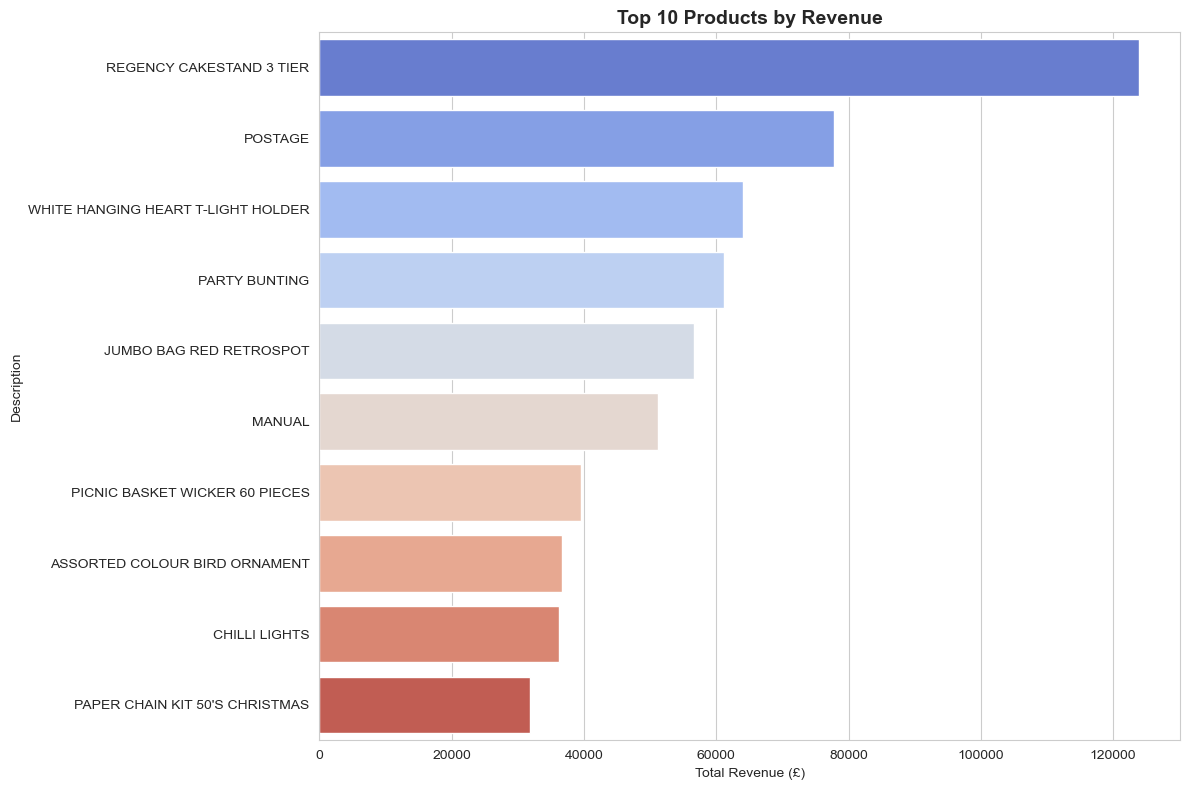

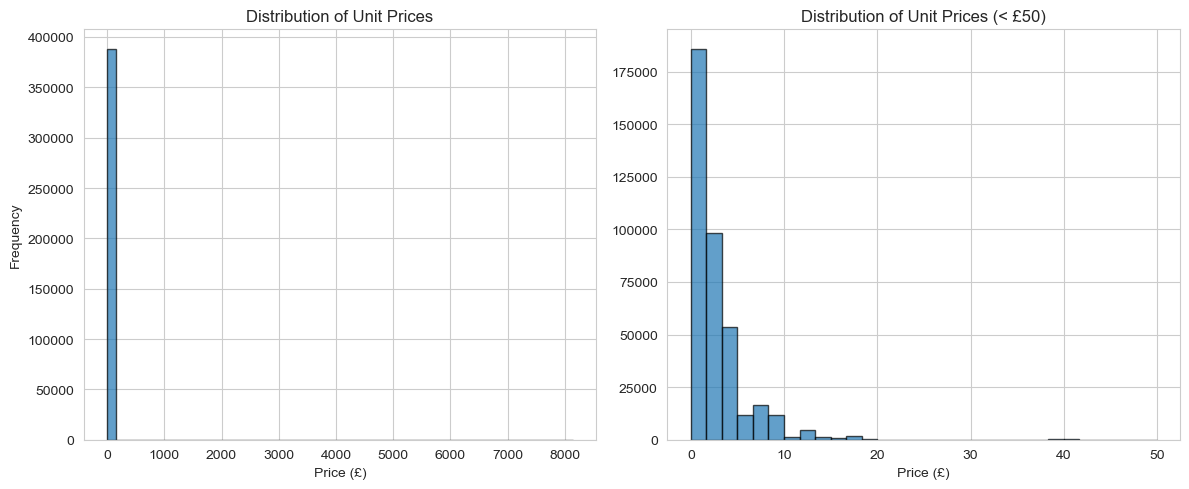

In [12]:
# Top 10 products by revenue
product_performance = df.groupby(['StockCode', 'Description']).agg({
    'TotalValue': 'sum',
    'Quantity': 'sum',
    'Customer ID': 'nunique'
}).rename(columns={'Customer ID': 'UniqueCustomers'}).nlargest(10, 'TotalValue')

plt.figure(figsize=(12, 8))
sns.barplot(x=product_performance['TotalValue'], y=product_performance.index.get_level_values(1), palette='coolwarm')
plt.title('Top 10 Products by Revenue', fontsize=14, fontweight='bold')
plt.xlabel('Total Revenue (£)')
plt.tight_layout()
plt.show()

# Price distribution analysis
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
df['Price'].hist(bins=50, edgecolor='black', alpha=0.7)
plt.title('Distribution of Unit Prices')
plt.xlabel('Price (£)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
# Filter very high prices for better visualization
reasonable_prices = df[df['Price'] < 50]
reasonable_prices['Price'].hist(bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribution of Unit Prices (< £50)')
plt.xlabel('Price (£)')

plt.tight_layout()
plt.show()

# 3.5 Geographic Analysis

C:\Users\ssaja\AppData\Local\Temp\ipykernel_23196\2217721768.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_revenue.values, y=country_revenue.index, palette='Set2')


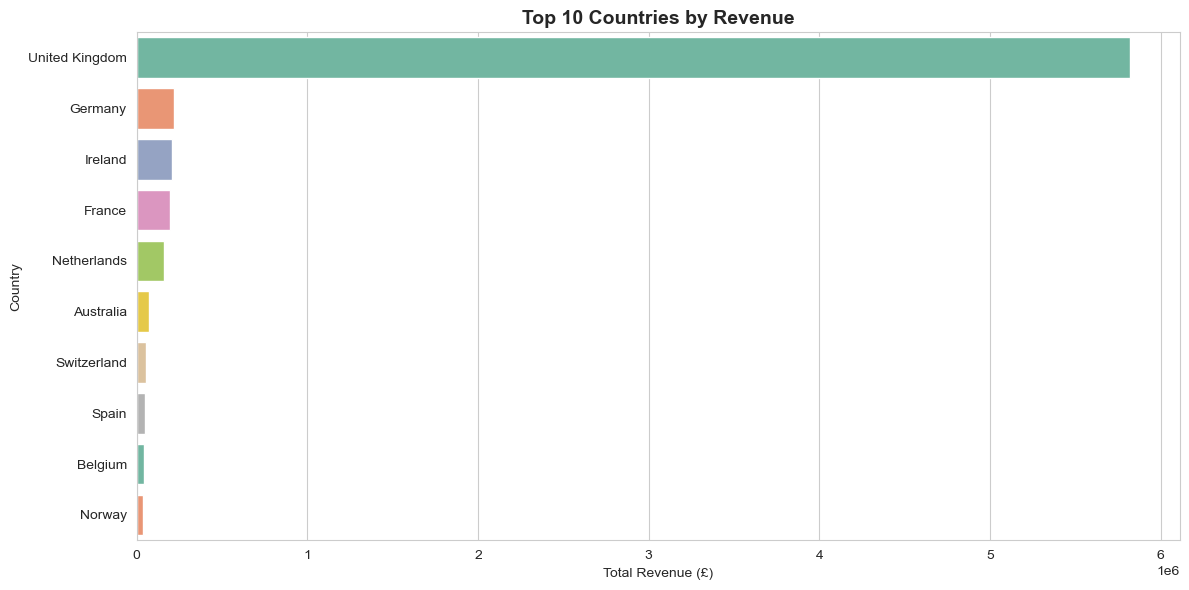

UK accounts for 84.8% of total revenue


In [13]:
# Revenue by country
country_revenue = df.groupby('Country')['TotalValue'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=country_revenue.values, y=country_revenue.index, palette='Set2')
plt.title('Top 10 Countries by Revenue', fontsize=14, fontweight='bold')
plt.xlabel('Total Revenue (£)')
plt.tight_layout()
plt.show()

print(f"UK accounts for {country_revenue.iloc[0] / country_revenue.sum() * 100:.1f}% of total revenue")

### 3.6 Key EDA Insights

**Major Findings:**
1. **Revenue Concentration:** [X]% of revenue comes from the top [Y]% of customers
2. **Seasonal Patterns:** Clear peaks in [month/season] suggesting seasonal demand
3. **Product Performance:** A small number of products drive majority of revenue
4. **Geographic Focus:** The business is predominantly UK-based with [X]% of revenue
5. **Customer Behavior:** Most customers make infrequent, low-value purchases

**Business Implications:**
- Focus marketing efforts on high-value customer retention
- Develop targeted campaigns for seasonal peaks
- Consider international expansion given domestic market dominance
- Implement loyalty programs to increase purchase frequency